Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Gasper Bizjan"

---

## Assignment 3 - Finite Differences
This assignment sheet will guide you through the process of setting up a Finite Difference Method (FDM) for the Poisson equation on a square domain 
$$-\Delta u = f \text{ in }\Omega=[a,b]^2$$
with homogenous Dirichlet boundary conditions
$$ u = 0 \text{ on } \delta \Omega$$ .

### 3.1 - Grid generation
In this part we will write a function ```generateGrid``` which generates an equistant grid for the domain $\Omega = [a,b]^2$ with $N$ grid-points in each direction.<br>
<b>INPUT:</b> $a,b$ - domain boundaries, $N$ - number of grid-points per direction<br>
<b>OUTPUT:</b> $grid$ - an array of dimension $N^2 \times 2$ with coordinates of all points.

In [2]:
import numpy as np

# YOUR CODE HERE
def generateGrid(a, b, N):
    '''
    generateGrid generates an equidistant grid for the domain  Ω=[𝑎,𝑏]^2  with  𝑁  grid-points in each direction.
    𝑎,𝑏  - domain boundaries,  
    𝑁  - number of grid-points per direction
    '''
    x = np.linspace(a, b, N) # 1D of the equidistant grid
    X, Y = np.meshgrid(x, x)  # 2D grid with matrix-representation NxN
    grid = np.stack( (np.squeeze(np.reshape(X, (N**2,1))),
                      np.squeeze(np.reshape(Y, (N**2,1)))  ), axis=1)
    
    # Other way
    #grid = np.zeros([N**2,2])
    #grid[:,0]=X.flatten()
    #grid[:,1]=Y.flatten()
    
    return grid

g = generateGrid(0,1,3)
print(g)

[[0.  0. ]
 [0.5 0. ]
 [1.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [1.  0.5]
 [0.  1. ]
 [0.5 1. ]
 [1.  1. ]]


### 3.2 - Assembly of the linear system
Here we will assemble the linear system corresponding with a Finite Difference scheme with respect to a certain grid. For a grid with $N\times N$ points our system has the size $N^2$ - remember why? - and the matrix entries are given by 
$$a_{ij} = \begin{cases}
				\text{if }P_i\in\delta\Omega & \begin{cases}
				1 & \text{if }j=i\\
				0 &\text{otherwise}
				\end{cases}\\
				\text{if }P_i\not\in\delta\Omega & \begin{cases}
				\dfrac{4}{h^2} & \text{ if }j=i\\
				\dfrac{-1}{h^2} & \text{ if } j\in\lbrace i-1,i+1,i-N,i+N\rbrace\\
				0 & \text{ otherwise}
				\end{cases}
				\end{cases}$$
while the right-hand side is given by
$$ l_i = \begin{cases}
0 & \text{ if }P_i \in \delta \Omega \\
f(P_i) & \text{ otherwise }
\end{cases}$$
with function values $f(P_i)$ at certain grid points.<br><br>
Write a function ```assembleSystem```. <br>
<b>INPUT:</b> $grid$ - an array of dimension $N^2 \times 2$ with coordinates of all points, $f:\mathbb{R}^2\rightarrow \mathbb{R}$ - a <i>lambda-function</i>  <br>
<b>OUTPUT:</b> $A$ - an array of dimension $N^2 \times N^2$, $l$ - an array of dimension $N^2$ <br><br>
Hint: Passing this exercise does not depend on the previous exercise to be fulfilled. If needed, create a grid manually to test your function!

In [25]:
import numpy as np

# YOUR CODE HERE
def assembleSystem(grid, f):
    # Initiation of arrays and values
    N = int(np.sqrt((np.shape(grid)[0])))# N float
    h = abs(grid[1,0]-grid[0,0]) # step size of the grid
    A = np.eye(N**2) # Identity matrix of size N**2
    l = np.zeros(N**2)
    
    for i in range(0, N**2):   # A loop for i,j from 0 to n
        if (i<N) or (i%N==0) or ((i+1)%N==0) or (i>(N-1)*N): # Select Boundary points
            continue  # Do nothing; jumps all to next loop, A is already an identity matrix
        
        A[i,i] = 4.0/h**2
        A[i,i-1] = -1.0/h**2
        A[i,i+1] = -1.0/h**2
        A[i,i-N] = -1.0/h**2
        A[i,i+N] = -1.0/h**2
        
        l[i] = f(grid[i,0], grid[i,1])

    return A, l

grid = generateGrid(0,1,4)
f=lambda x,y: 1
A, l = assembleSystem(grid, f)
print(A, l)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -9.  0.  0. -9. 36. -9.  0.  0. -9.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -9.  0.  0. -9. 36. -9.  0.  0. -9.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -9.  0.  0. -9. 36. -9.  0.  0. -9.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -9.  0.  0. -9. 36. -9.  0.  0. -9.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

### 3.3 - vectorized Matrix assembler (Optional) 
Write the Matrix assembler ```assembleSystem``` from above again but vectorized by numpy functions. 

In [26]:
import numpy as np

# YOUR CODE HERE

### 3.4 - Solving the problem
Solve the following poisson problem by using the functions defined above and visualize the solution. <br>

$$-\Delta u = 1 \text{ in }\Omega=[-1,1]^2$$
$$ u = 0 \text{ on } \delta \Omega$$

<ipython-input-30-4a6ac392b035>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh( g[:,0].reshape([N,N]), g[:,1].reshape([N,N]), u.reshape([N,N]) )


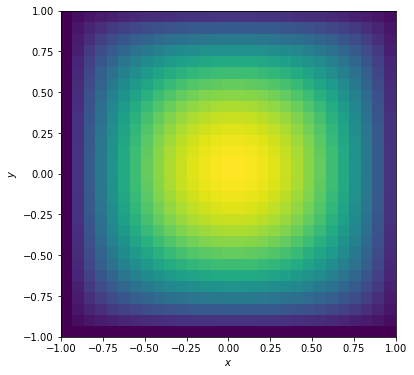

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# YOUR CODE HERE
# Solver
a=-1
b=1
N=30
f = lambda x,y: 1.0 #defindined 2D force vector
g = generateGrid(a, b, N) # defined grid
# Solves for u: A*u=l
u = np.linalg.solve(assembleSystem(g, f)[0], assembleSystem(g, f)[1]) 
# Result #Uncomment to show results of array u
# print("u=", u) 

# Visualization
plt.rcParams["figure.figsize"] = [6, 6] # Seting size
fig = plt.figure() # creating figure
ax = fig.add_subplot(111)
ax.pcolormesh( g[:,0].reshape([N,N]), g[:,1].reshape([N,N]), u.reshape([N,N]) )
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()